## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

##DATA PREPROCESSING

In [2]:
data=pd.read_csv("2018-15KV-XLPE Cable.csv")
data.head()

,ID,Age,Partial Discharge,Visual Condition,Natural Corrosion,Loading,Health Index
0,1,18,0.08,Medium,0.53,646,4
1,2,28,0.21,Medium,0.71,131,4
2,3,27,0.19,Medium,0.69,552,4
3,4,18,0.07,Medium,0.53,155,4
4,5,16,0.06,Good,0.50,349,5


In [3]:
data=data.rename(columns={"Natural Corrosion":"Neutral Corrosion"})

In [4]:
data.tail()

,ID,Age,Partial Discharge,Visual Condition,Neutral Corrosion,Loading,Health Index
2495,2496,19,0.09,Medium,0.54,274,4
2496,2497,45,0.65,Poor,0.93,293,2
2497,2498,15,0.05,Good,0.48,280,5
2498,2499,51,0.92,Poor,0.99,413,1
2499,2500,16,0.05,Good,0.49,544,5


In [5]:
np.random.seed(41)
data=data.sample(frac=1)
data

,ID,Age,Partial Discharge,Visual Condition,Neutral Corrosion,Loading,Health Index
299,300,42,0.56,Poor,0.89,581,2
624,625,38,0.43,Poor,0.78,411,3
2289,2290,16,0.06,Good,0.46,259,5
909,910,48,0.75,Poor,0.95,169,2
1326,1327,20,0.10,Medium,0.53,333,4
...,...,...,...,...,...,...,...
243,244,37,0.42,Poor,0.84,272,3
321,322,38,0.43,Poor,0.86,414,3
1104,1105,23,0.13,Medium,0.62,130,4
931,932,21,0.11,Medium,0.58,261,4


In [6]:
df=data.drop("ID",axis=1)
df.head()

,Age,Partial Discharge,Visual Condition,Neutral Corrosion,Loading,Health Index
299,42,0.56,Poor,0.89,581,2
624,38,0.43,Poor,0.78,411,3
2289,16,0.06,Good,0.46,259,5
909,48,0.75,Poor,0.95,169,2
1326,20,0.10,Medium,0.53,333,4


In [7]:
df.shape

(2500, 6)

In [8]:
df["Visual Condition"].value_counts()

Poor      1475
Medium     550
Good       475
Name: Visual Condition, dtype: int64

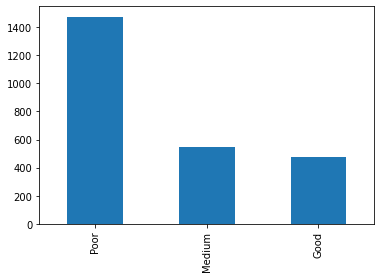

In [9]:
df["Visual Condition"].value_counts().plot(kind="bar");

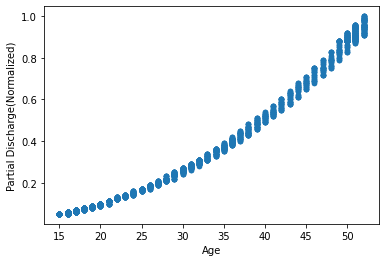

In [14]:
df.plot(x="Age",y="Partial Discharge",kind="scatter",ylabel="Partial Discharge(Normalized)");

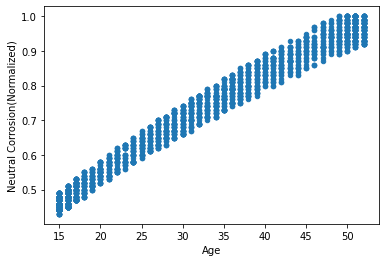

In [13]:
df.plot(x="Age",y="Neutral Corrosion",kind="scatter",legend=True,ylabel="Neutral Corrosion(Normalized)");

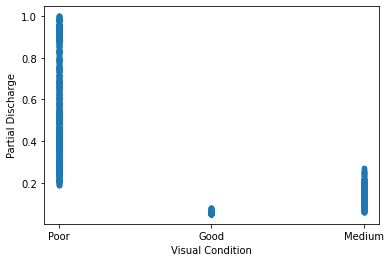

In [26]:
df.plot(x="Visual Condition",y="Partial Discharge",kind="scatter")

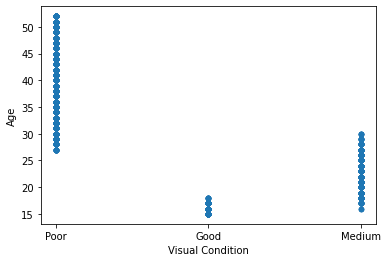

In [27]:
df.plot(x="Visual Condition",y="Age",kind="scatter");

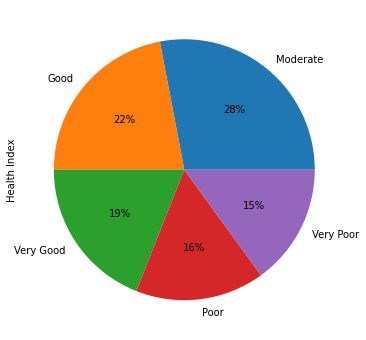

In [ ]:
df["Health Index"].value_counts().plot(kind="pie",figsize=(10,6),autopct='%1.0f%%',labels=["Moderate","Good","Very Good","Poor","Very Poor"]);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 299 to 1984
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2500 non-null   int64  
 1   Partial Discharge  2500 non-null   float64
 2   Visual Condition   2500 non-null   object 
 3   Neutral Corrosion  2500 non-null   float64
 4   Loading            2500 non-null   int64  
 5   Health Index       2500 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 136.7+ KB


In [ ]:
df.isna().sum()

Age                  0
Partial Discharge    0
Visual Condition     0
Neutral Corrosion    0
Loading              0
Health Index         0
dtype: int64

In [ ]:
df.describe()

,Age,Partial Discharge,Neutral Corrosion,Loading,Health Index
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,32.209200,0.383312,0.719576,361.661200,3.140000
std,12.553393,0.309318,0.177716,169.854421,1.311903
min,15.000000,0.050000,0.430000,60.000000,1.000000
25%,20.000000,0.100000,0.550000,214.750000,2.000000
50%,32.000000,0.290000,0.730000,366.000000,3.000000
75%,43.000000,0.620000,0.880000,511.000000,4.000000
max,52.000000,1.000000,1.000000,650.000000,5.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


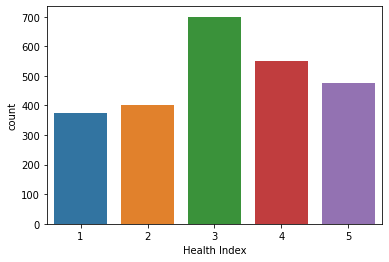

In [ ]:
sns.countplot(df['Health Index']);

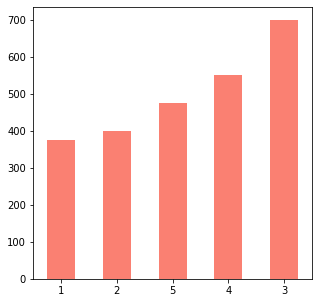

In [ ]:
df["Health Index"].value_counts().plot(kind="bar",figsize=(5,5),color="salmon").invert_xaxis();
plt.xticks(rotation=0);

### SEPARATING X AND Y

In [ ]:
X=df.drop("Health Index",axis=1)
y=df["Health Index"]

In [ ]:
X

,Age,Partial Discharge,Visual Condition,Neutral Corrosion,Loading
299,42,0.56,Poor,0.89,581
624,38,0.43,Poor,0.78,411
2289,16,0.06,Good,0.46,259
909,48,0.75,Poor,0.95,169
1326,20,0.10,Medium,0.53,333
...,...,...,...,...,...
243,37,0.42,Poor,0.84,272
321,38,0.43,Poor,0.86,414
1104,23,0.13,Medium,0.62,130
931,21,0.11,Medium,0.58,261


In [ ]:
y

299     2
624     3
2289    5
909     2
1326    4
       ..
243     3
321     3
1104    4
931     4
1984    5
Name: Health Index, Length: 2500, dtype: int64

### CHANGING OBJECT INTO NUMERICAL FORM

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
X

array([[0.00e+00, 0.00e+00, 1.00e+00, ..., 5.60e-01, 8.90e-01, 5.81e+02],
       [0.00e+00, 0.00e+00, 1.00e+00, ..., 4.30e-01, 7.80e-01, 4.11e+02],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 6.00e-02, 4.60e-01, 2.59e+02],
       ...,
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 1.30e-01, 6.20e-01, 1.30e+02],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 1.10e-01, 5.80e-01, 2.61e+02],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 5.00e-02, 4.40e-01, 1.69e+02]])

In [ ]:
y

299     2
624     3
2289    5
909     2
1326    4
       ..
243     3
321     3
1104    4
931     4
1984    5
Name: Health Index, Length: 2500, dtype: int64

In [ ]:
X[:2]

array([[0.00e+00, 0.00e+00, 1.00e+00, 4.20e+01, 5.60e-01, 8.90e-01,
        5.81e+02],
       [0.00e+00, 0.00e+00, 1.00e+00, 3.80e+01, 4.30e-01, 7.80e-01,
        4.11e+02]])

### SEPARATING X AND Y

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_train[:5]

array([[0.00e+00, 0.00e+00, 1.00e+00, 3.50e+01, 3.80e-01, 7.40e-01,
        6.20e+01],
       [0.00e+00, 0.00e+00, 1.00e+00, 3.60e+01, 4.10e-01, 8.20e-01,
        2.11e+02],
       [0.00e+00, 0.00e+00, 1.00e+00, 3.40e+01, 3.30e-01, 7.40e-01,
        2.49e+02],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.40e+01, 1.40e-01, 6.00e-01,
        6.29e+02],
       [0.00e+00, 1.00e+00, 0.00e+00, 1.90e+01, 9.00e-02, 5.50e-01,
        1.99e+02]])

In [ ]:
y_train[:5]

397     3
683     3
2064    3
1596    4
999     4
Name: Health Index, dtype: int64

In [ ]:
len(y_test)

500

### FEATURE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train[:2]

array([[-0.47722854, -0.53185866,  0.82674161,  0.22153145, -0.00897107,
         0.11163577, -1.75335055],
       [-0.47722854, -0.53185866,  0.82674161,  0.30181101,  0.08854056,
         0.56520922, -0.88152444]])

In [ ]:
X_test[:2]

array([[-0.47722854, -0.53185866,  0.82674161,  0.70320882,  0.47858706,
         0.90538932, -0.85226853],
       [-0.47722854, -0.53185866,  0.82674161,  0.46237014,  0.25105993,
         0.62190591, -0.44853698]])

## APPLYING MACHINE LEARNING MODEL

### RANDOM FOREST MODEL

In [ ]:
%%time
np.random.seed(41)
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=RandomForestClassifier()
model.fit(X_train,y_train)

CPU times: user 268 ms, sys: 4.62 ms, total: 273 ms
Wall time: 285 ms


In [ ]:
model.score(X_test,y_test)

0.968

In [ ]:
y_preds=model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        70
           2       0.89      0.93      0.91        87
           3       0.96      0.93      0.94       139
           4       1.00      1.00      1.00       110
           5       1.00      1.00      1.00        94

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



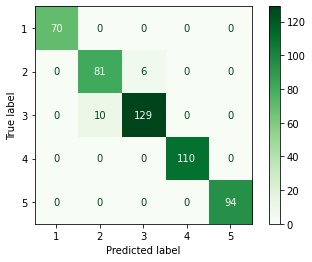

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_preds,cmap="Greens")
plt.grid(False);

In [ ]:
# #Preparing the parameter gird:
# n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# criterion = ['gini', 'entropy']
# max_features = ['auto', 'sqrt']
# max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
# min_samples_split = [ 4, 8, 16]
# min_samples_leaf = [ 4, 8, 16]
# bootstrap = [True]
 
# param_grid = {'n_estimators': n_estimators,
#                 'criterion': criterion,
#                 'max_features': max_features,
#                 'max_depth': max_depth,
#                 'min_samples_split': min_samples_split,
#                 'min_samples_leaf': min_samples_leaf,
#                 'bootstrap': bootstrap}

# #Finding the best parameters:
# #Warning: depending on your setup, this code may take a long time to run! (~30min for me)

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
 
# rf_classifier = RandomForestClassifier()
 
# # `n_jobs` means parallel jobs to run -> -1 means using all processors
# grid_search = GridSearchCV(rf_classifier, param_grid, cv = 2, verbose = 1, n_jobs = -1)
 
# grid_fit = grid_search.fit(X_train, y_train)
# grid_fit.best_params_
# Using the best parameters to train the RF classifier:

# Use best params from the grid search
#grid_classifier = RandomForestClassifier(n_estimators=10, 
                                        #criterion='gini',
                                        #bootstrap=True,
                                        #max_depth=10,
                                        #max_features='sqrt',
                                        #min_samples_leaf=8,
                                        #min_samples_split=2,
                                        #random_state = 0)
#grid_classifier.fit(X_train, y_train)


In [ ]:
grid_classifier = RandomForestClassifier(n_estimators=10, 
                                        criterion='gini',
                                        bootstrap=True,
                                        max_depth=80,
                                        max_features='auto',
                                        min_samples_leaf=8,
                                        min_samples_split=4,
                                        random_state = 0)
grid_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=80, min_samples_leaf=8, min_samples_split=4,
                       n_estimators=10, random_state=0)

In [ ]:
grid_classifier.score(X_test,y_test)

0.976

In [ ]:
y_preds=grid_classifier.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        70
           2       0.93      0.93      0.93        87
           3       0.96      0.96      0.96       139
           4       1.00      1.00      1.00       110
           5       1.00      1.00      1.00        94

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



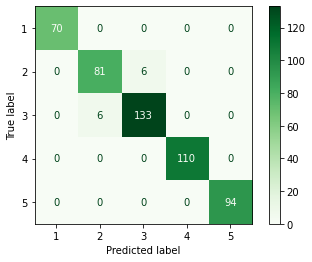

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_preds,cmap="Greens")
plt.grid(False);

### Gaussian Naive Bayes

In [ ]:
np.random.seed(42)
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
gnb.score(X_test,y_test)

0.964

In [ ]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

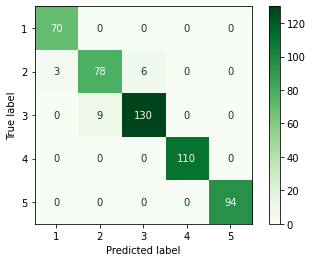

In [ ]:
y_preds=gnb.predict(X_test)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_preds,cmap="Greens")
plt.grid(False);

In [ ]:
y_preds=gnb.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        70
           2       0.90      0.90      0.90        87
           3       0.96      0.94      0.95       139
           4       1.00      1.00      1.00       110
           5       1.00      1.00      1.00        94

    accuracy                           0.96       500
   macro avg       0.96      0.97      0.96       500
weighted avg       0.96      0.96      0.96       500



### KNeighbors Classifiers

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
knn.score(X_test,y_test)

0.854

In [ ]:
# #List Hyperparameters that we want to tune.
# from sklearn.model_selection import GridSearchCV
# leaf_size = list(range(1,50))
# n_neighbors = list(range(1,30))
# p=[1,2]
# #Convert to dictionary
# hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
# #Create new KNN object
# knn_2 = KNeighborsClassifier()
# #Use GridSearch
# clf = GridSearchCV(knn_2, hyperparameters, cv=10)
# #Fit the model
# best_model = clf.fit(X,y)
# #Print The value of best Hyperparameters
# print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
# print('Best p:', best_model.best_estimator_.get_params()['p'])
# print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [ ]:
knn1=KNeighborsClassifier(leaf_size=1,p=1,n_neighbors=1)
knn1.fit(X_train,y_train)
knn1.score(X_test,y_test)

0.9

In [ ]:
y_preds=knn1.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           1       0.90      0.96      0.93        82
           2       0.77      0.75      0.76        67
           3       0.91      0.88      0.90       146
           4       0.90      0.92      0.91        97
           5       0.96      0.96      0.96       108

    accuracy                           0.90       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.90      0.90      0.90       500



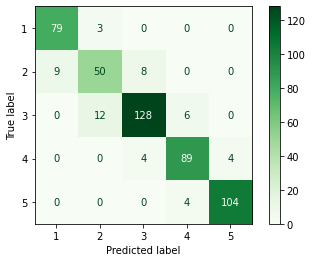

In [ ]:
y_preds=knn1.predict(X_test)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_preds,cmap="Greens")
plt.grid(False);

### SVM

In [ ]:
%%time
from sklearn import svm
svm1=svm.SVC()
svm1.fit(X_train,y_train)
svm1.score(X_test,y_test)

CPU times: user 378 ms, sys: 3.63 ms, total: 382 ms
Wall time: 382 ms


In [ ]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV
 
# # defining parameter range
# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']}
 
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# # fitting the model for grid search
# grid.fit(X_train, y_train)

In [ ]:
# grid.best_params_

In [ ]:
from sklearn import svm
svm2= svm.SVC(kernel='rbf',gamma=0.0001,C=1000)
svm2.fit(X_train,y_train)
svm2.score(X_test,y_test)

0.958

In [ ]:
y_preds=svm2.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           1       0.93      0.98      0.95        82
           2       0.87      0.81      0.84        67
           3       0.95      0.96      0.96       146
           4       1.00      1.00      1.00        97
           5       1.00      1.00      1.00       108

    accuracy                           0.96       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.96      0.96      0.96       500



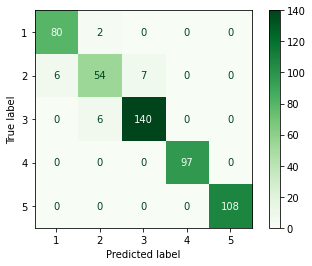

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_preds,cmap="Greens")
plt.grid(False);

### DECISION TREE CLASSIFIER

In [ ]:
np.random.seed(42)
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test)

0.958

In [ ]:
y_preds=dtc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        82
           2       0.84      0.85      0.84        67
           3       0.93      0.92      0.93       146
           4       1.00      1.00      1.00        97
           5       1.00      1.00      1.00       108

    accuracy                           0.96       500
   macro avg       0.95      0.96      0.95       500
weighted avg       0.96      0.96      0.96       500



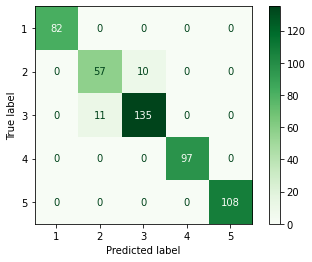

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_preds,cmap="Greens")
plt.grid(False);

### LOGISTIC REGRESSION

In [ ]:
np.random.seed(41)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.952

In [ ]:
y_preds=lr.predict(X_test)

In [ ]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           1       0.94      0.94      0.94        82
           2       0.82      0.82      0.82        67
           3       0.95      0.95      0.95       146
           4       1.00      1.00      1.00        97
           5       1.00      1.00      1.00       108

    accuracy                           0.95       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.95      0.95      0.95       500



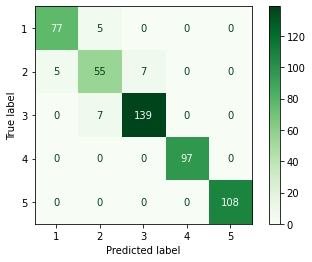

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_preds,cmap="Greens")
plt.grid(False);

In [ ]:
# from sklearn.model_selection import RepeatedStratifiedKFold
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
# penalty = ['l2']
# c_values = [100, 10, 1.0, 0.1, 0.01]
# # define grid search
# grid = dict(solver=solvers,penalty=penalty,C=c_values)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X, y)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
# grid_result.best_params_

In [ ]:
lr=LogisticRegression(C=100,penalty='l2',solver='newton-cg',max_iter=10000)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.96

In [ ]:
y_preds=lr.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        82
           2       0.90      0.79      0.84        67
           3       0.95      0.96      0.96       146
           4       1.00      1.00      1.00        97
           5       1.00      1.00      1.00       108

    accuracy                           0.96       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.96      0.96      0.96       500



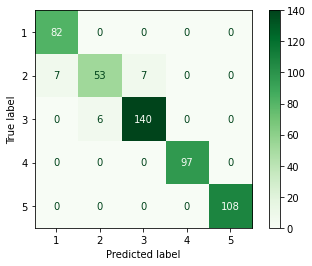

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_preds,cmap="Greens")
plt.grid(False);

## COMPARISON OF ALL MODELS

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

classification_models = []
classification_models.append(('LR', LogisticRegression(solver="newton-cg",penalty='l2',C= 100,max_iter=10000)))
classification_models.append(('KNN', KNeighborsClassifier(leaf_size=1,p=1,n_neighbors=1,metric="minkowski")))
classification_models.append(('SVM', SVC(kernel='rbf',gamma=0.0001,C=1000)))
classification_models.append(('NB', GaussianNB()))
classification_models.append(('DT', DecisionTreeClassifier(criterion = "entropy")))
classification_models.append(('RF', RandomForestClassifier(max_depth=80,min_samples_leaf=8,min_samples_split=4,n_estimators=10,max_features='auto',random_state=0)))

for name, model in classification_models:
    kfold = KFold(n_splits=10)
    result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100, result.std()*100))

LR: Mean Accuracy = 96.52% - SD Accuracy = 1.36%
KNN: Mean Accuracy = 89.44% - SD Accuracy = 2.26%
SVM: Mean Accuracy = 95.80% - SD Accuracy = 1.33%
NB: Mean Accuracy = 95.64% - SD Accuracy = 1.23%
DT: Mean Accuracy = 95.88% - SD Accuracy = 1.01%
RF: Mean Accuracy = 96.72% - SD Accuracy = 1.20%


In [ ]:
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_preds labels on a classification model.
    """
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds,average='macro')
    recall=recall_score(y_true,y_preds,average='macro')
    f1=f1_score(y_true,y_preds,average='macro')
    metric_dict={"accuracy":round(accuracy,2),
                 "precision":round(precision,2),
                 "recall":round(recall,2),
                 "f1":round(f1,2)}
    print(f'Acc:{accuracy*100:.2f}%')
    print(f'Precision:{precision:.2f}')
    print(f'Recall:{recall:.2f}')
    print(f'f1_score:{f1:.2f}')
    
    return metric_dict

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [ ]:
rf_metrics=evaluate_preds(y_test,grid_classifier.predict(X_test))

Acc:97.60%
Precision:0.97
Recall:0.97
f1_score:0.97


In [ ]:
nb_y_preds=gnb.predict(X_test)

#Evaluate the predictions
gnb_metrics=evaluate_preds(y_test,nb_y_preds)

Acc:96.00%
Precision:0.95
Recall:0.95
f1_score:0.95


In [ ]:
knn_y_preds=knn1.predict(X_test)

#Evaluate the predictions
knn_metrics=evaluate_preds(y_test,knn_y_preds)

Acc:90.00%
Precision:0.89
Recall:0.89
f1_score:0.89


In [ ]:
svm_y_preds=svm2.predict(X_test)

#Evaluate the predictions
svm_metrics=evaluate_preds(y_test,svm_y_preds)

Acc:95.80%
Precision:0.95
Recall:0.95
f1_score:0.95


In [ ]:
lr_y_preds=lr.predict(X_test)

#Evaluate the predictions
lr_metrics=evaluate_preds(y_test,lr_y_preds)

Acc:96.00%
Precision:0.95
Recall:0.95
f1_score:0.95


In [ ]:
dtc_y_preds=dtc.predict(X_test)

#Evaluate the predictions
dtc_metrics=evaluate_preds(y_test,dtc_y_preds)

Acc:95.80%
Precision:0.95
Recall:0.96
f1_score:0.95


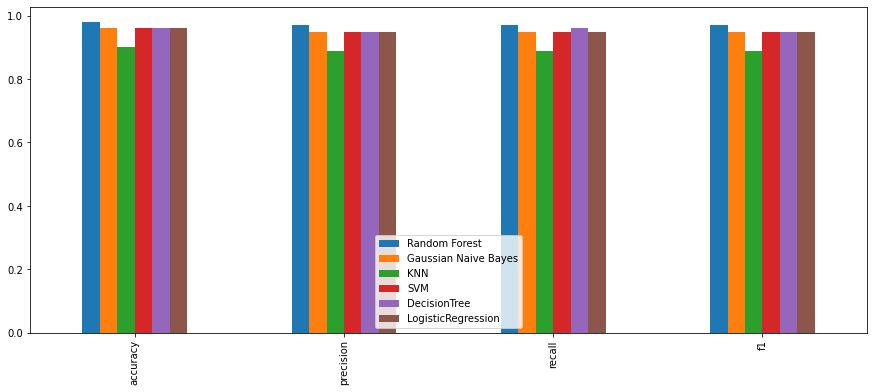

In [ ]:
compare_metrics=pd.DataFrame({"Random Forest":rf_metrics,
                             "Gaussian Naive Bayes":gnb_metrics,
                              "KNN":knn_metrics,
                             "SVM":svm_metrics,
                             "DecisionTree":dtc_metrics,
                             "LogisticRegression":lr_metrics})
compare_metrics.plot.bar(figsize=(15,6));

## ANN MODEL

In [ ]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(7,),activation='relu'),
    keras.layers.Dense(15,input_shape=(7,),activation='relu'),
    keras.layers.Dense(15,input_shape=(7,),activation='relu'),
    keras.layers.Dense(15,input_shape=(7,),activation='relu'),
    keras.layers.Dense(15,input_shape=(7,),activation='relu'),
    keras.layers.Dense(15,input_shape=(7,),activation='relu'),
    keras.layers.Dense(15,input_shape=(7,),activation='relu'),
    keras.layers.Dense(8,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history=model.fit(X_train,y_train,epochs=400,validation_split=0.25)

Epoch 1/400
47/47 [==============================] - 1s 8ms/step - loss: 1.8275 - accuracy: 0.2260 - val_loss: 1.6970 - val_accuracy: 0.2480
Epoch 2/400
47/47 [==============================] - 0s 5ms/step - loss: 1.6455 - accuracy: 0.2580 - val_loss: 1.6037 - val_accuracy: 0.2700
Epoch 3/400
47/47 [==============================] - 0s 5ms/step - loss: 1.5548 - accuracy: 0.3093 - val_loss: 1.5214 - val_accuracy: 0.2700
Epoch 4/400
47/47 [==============================] - 0s 5ms/step - loss: 1.4775 - accuracy: 0.3093 - val_loss: 1.4334 - val_accuracy: 0.3280
Epoch 5/400
47/47 [==============================] - 0s 4ms/step - loss: 1.3847 - accuracy: 0.3513 - val_loss: 1.3277 - val_accuracy: 0.3700
Epoch 6/400
47/47 [==============================] - 0s 4ms/step - loss: 1.3225 - accuracy: 0.3713 - val_loss: 1.2817 - val_accuracy: 0.4480
Epoch 7/400
47/47 [==============================] - 0s 4ms/step - loss: 1.2383 - accuracy: 0.3773 - val_loss: 1.1811 - val_accuracy: 0.4280
Epoch 8/400
4

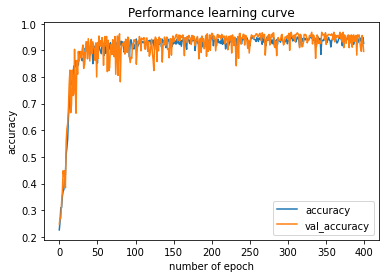

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Performance learning curve')
plt.ylabel('accuracy')
plt.xlabel('number of epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show()

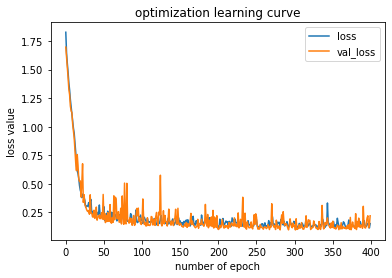

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('optimization learning curve')
plt.ylabel('loss value')
plt.xlabel('number of epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

In [ ]:
y_pred=model.predict(X_test)
y_pred_class=np.argmax(y_pred,axis=1)
y_test_class=np.array(y_test)
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           1       0.75      1.00      0.85        82
           2       0.62      0.57      0.59        67
           3       0.99      0.84      0.91       146
           4       1.00      1.00      1.00        97
           5       1.00      1.00      1.00       108

    accuracy                           0.90       500
   macro avg       0.87      0.88      0.87       500
weighted avg       0.91      0.90      0.90       500



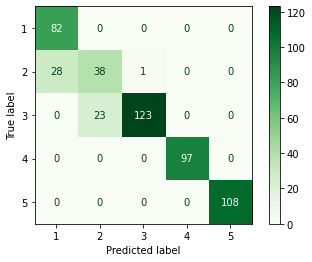

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test_class,y_pred_class,cmap="Greens")
plt.grid(False);